# **Comparative analysis**

The project contains data that I received from a company to investigate whether a product produced by an innovative technology has different (*better*) properties than one produced by a standard method. Unfortunately, I cannot provide detailed information. 

Each dataset contains the same cut material (*same blocks*) and represents a single product - a block. Datasets starting with "st" contain data for material made with the standard procedure, while those starting with "in" - an innovative procedure.

Three pairs of appropriately numbered blocks were prepared for comparison: 11, 20, and 30. <br/>
The unit of measurement is the same for all blocks.

## Main goal

+ Does the block produced with innovative technology differ significantly from the one produced with the standard method?

In [34]:
# Packages

import pandas as pd
import numpy as np
from scipy.stats import shapiro, norm, sem, mannwhitneyu
import seaborn as sns
import matplotlib.pyplot as plt

# Loading and viewing datasets

In [35]:
st11 = pd.read_csv("standard_11.csv", sep=";", decimal=',').drop(columns="Index")
in11 = pd.read_csv("innowacja_11.csv", sep=";", decimal=',').drop(columns="Index")
st20 = pd.read_csv("standard_20.csv", sep=";", decimal=',').drop(columns="Index")
in20 = pd.read_csv("innowacja_20.csv", sep=";", decimal=',').drop(columns="Index")
st30 = pd.read_csv("standard_30.csv", sep=";", decimal=',').drop(columns="Index")
in30 = pd.read_csv("innowacja_30.csv", sep=";", decimal=',').drop(columns="Index")

# Dictionary----

# Datasets

datasets = {
    'st11': st11,
    'in11': in11,
    'st20': st20,
    'in20': in20,
    'st30': st30,
    'in30': in30
}

# Stacked datasers for statistical analysis purposes

datasets_stacked = {
    'st11_stacked': st11.stack().values,
    'in11_stacked': in11.stack().values,
    'st20_stacked': st20.stack().values,
    'in20_stacked': in20.stack().values,
    'st30_stacked': st30.stack().values,
    'in30_stacked': in30.stack().values
}

# Subtracted datasets

datasets_subtract = {
    'in11 - st11': in11-st11,
    'in20 - st20': in20-st20,
    'in30 - st30': in30-st30
}

# Dataset for comparison

datasets_comp = {
    'Block 11': pd.DataFrame({'st11':st11.stack().values, 'in11':in11.stack().values}),
    'Block 20': pd.DataFrame({'st20':st20.stack().values, 'in20':in20.stack().values}),
    'Block 30': pd.DataFrame({'st30':st30.stack().values, 'in30':in30.stack().values})
}

In [36]:

# Loop for basic review of datasets

for name, value in datasets.items():
    print(name,
          "\n-------------",
          "\nshape ->", value.shape,
          "\n number of elements ->", value.count().sum(),
          "\n missing data ->", value.isna().sum().sum())
    print()

st11 
------------- 
shape -> (12, 10) 
 number of elements -> 120 
 missing data -> 0

in11 
------------- 
shape -> (12, 10) 
 number of elements -> 120 
 missing data -> 0

st20 
------------- 
shape -> (12, 10) 
 number of elements -> 120 
 missing data -> 0

in20 
------------- 
shape -> (12, 10) 
 number of elements -> 120 
 missing data -> 0

st30 
------------- 
shape -> (12, 10) 
 number of elements -> 120 
 missing data -> 0

in30 
------------- 
shape -> (12, 10) 
 number of elements -> 120 
 missing data -> 0



Each block of material is cut lengthwise and crosswise into equal cuboids. Thus, each block consists of 120 elements that have been measured for a particular physical property. There are no gaps in the datasets.

# Basic statistics 

In [37]:
# Maximum, minimum, std and mean values

for name, value in datasets.items():
    print(name,
          "\n-------------")
    print("max ->", value.max().max(),
          "\nmin ->", value.min().min(),
          "\nmax std ->", "%.4f" % (value.std().max()),
          "\nmax mean ->", "%.4f" % (value.mean().max()))
    print()

st11 
-------------
max -> 11.9 
min -> 10.3 
max std -> 0.3651 
max mean -> 11.1333

in11 
-------------
max -> 11.0 
min -> 10.6 
max std -> 0.1403 
max mean -> 10.8833

st20 
-------------
max -> 21.2 
min -> 18.9 
max std -> 0.3215 
max mean -> 20.3167

in20 
-------------
max -> 20.1 
min -> 19.5 
max std -> 0.1348 
max mean -> 19.9750

st30 
-------------
max -> 31.1 
min -> 29.0 
max std -> 0.6296 
max mean -> 30.4917

in30 
-------------
max -> 30.2 
min -> 29.5 
max std -> 0.2229 
max mean -> 29.9750



In the above listing, the largest and smallest value from a given block was selected. The highest mean value and standard deviation are also shown. 

# Basic block comparison

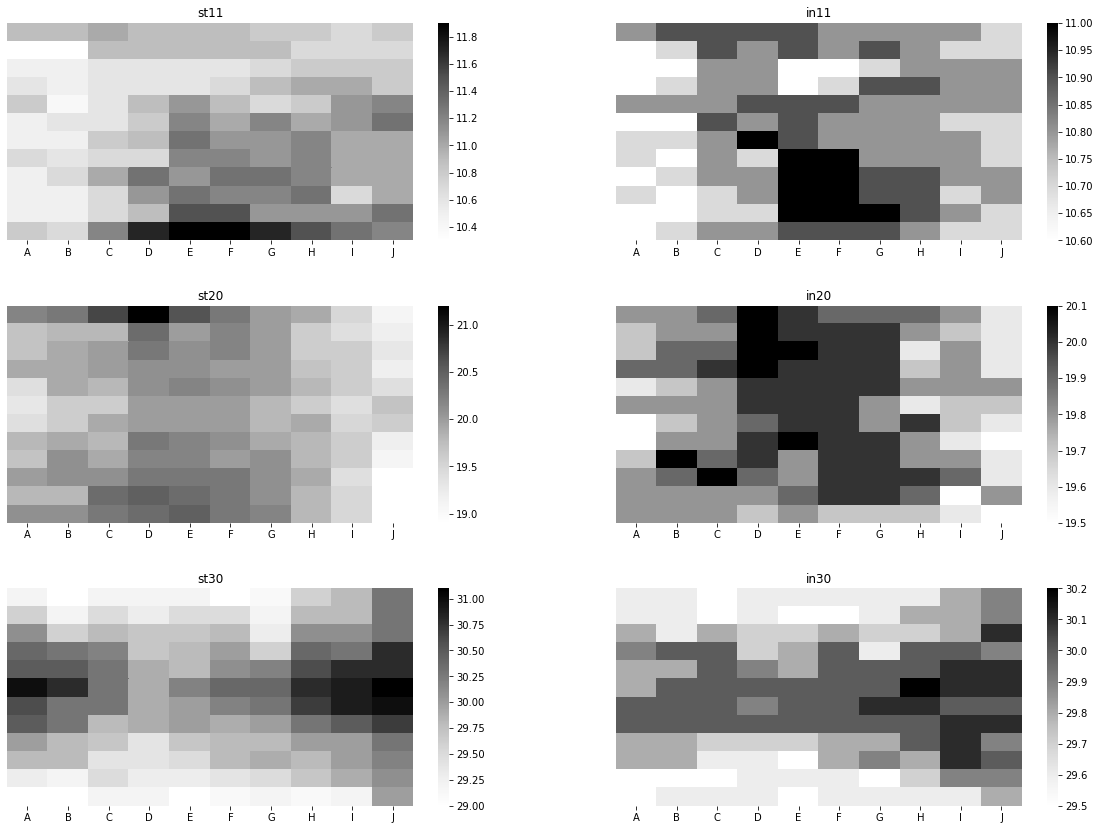

In [38]:
# Heatmaps for datasets

counter = 1
plt.subplots(figsize=(20, 30))

for name, value in datasets.items():
    plt.subplot(len(datasets), 2, counter)
    plt.subplots_adjust(hspace = 0.3)
    sns.heatmap(value, 
                cmap="Greys", 
                yticklabels=False)
    plt.title(name)

    counter+=1

Heatmaps perfectly show how the values of the measured physical characteristic are distributed among the individual block elements. 

We can see that the blocks made with the innovative technology contain a larger number of blocks with higher, more uniform, values of the examined characteristic.

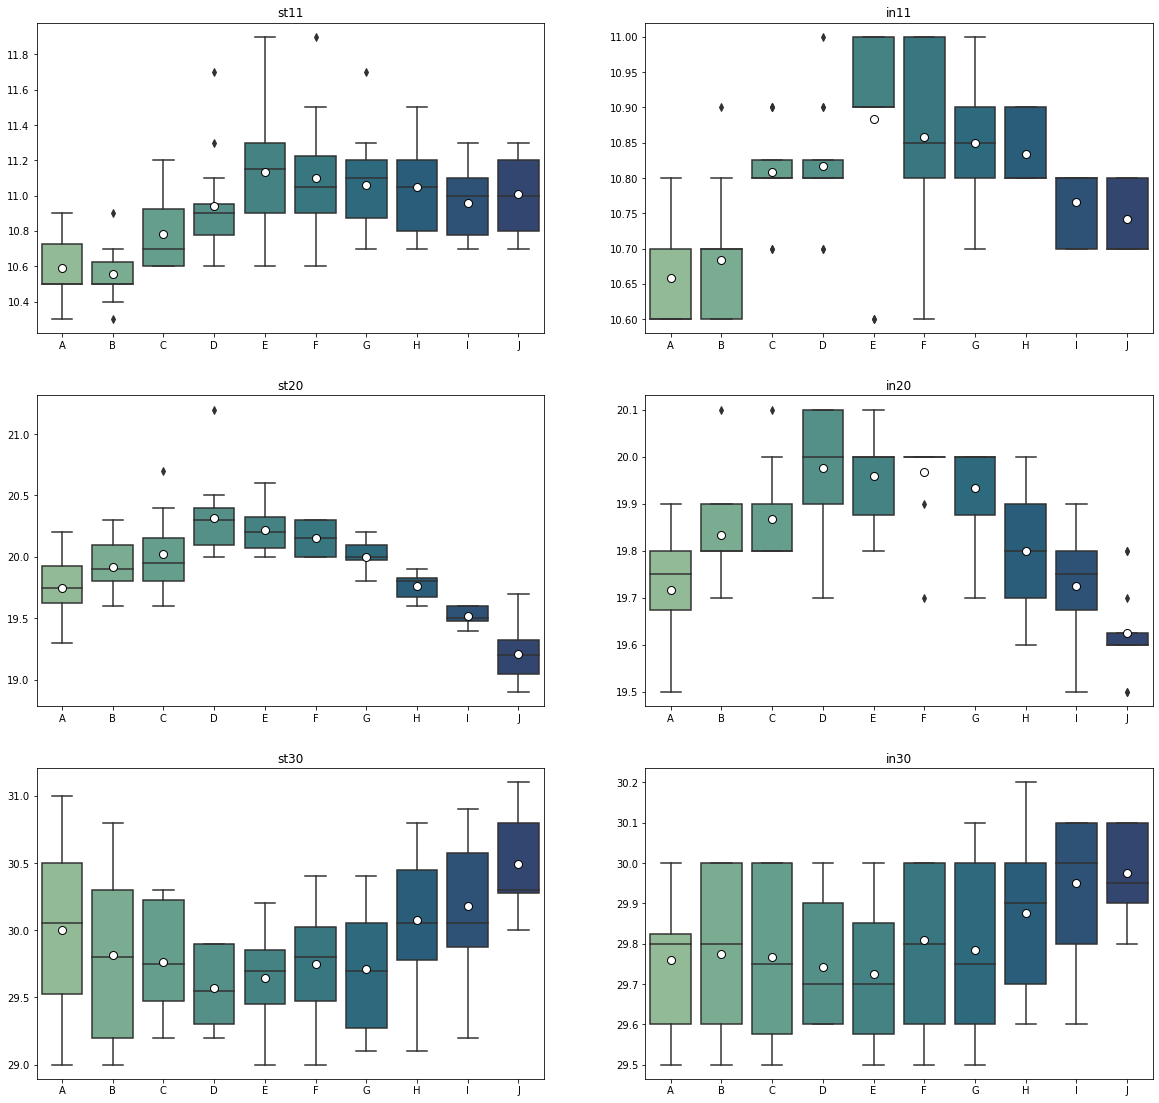

In [39]:
# Boxplots for datasets

counter = 1
plt.subplots(figsize=(20, 40))

for name, value in datasets.items():
    plt.subplot(len(datasets), 2, counter)
    sns.boxplot(data=value, 
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                           "markersize":"8"},
                palette="crest")
    plt.title(name)

    counter+=1

Each boxplot contains information about the three quartiles (box and dash) and 1.5*IQR as whiskers. In addition, a white circle representing the mean is included. 
Graphs prepared in this way can be used to compare individual vertical block slices with each other. 

# Statistical hypothesis testing and confidence interval for the mean

In [40]:
# Shapiro normality test and Confidence Intervals for mean

for name, value in datasets_stacked.items():
    s, b = shapiro(value)
    up, down = norm.interval(alpha=0.95, loc = np.mean(value), scale = sem(value))
    print(name,
          "\n-------------"
          "\nmean ->","%.3f" %(value.mean()),
          "\n95% interval form mean ->", np.round(up,3), " - ", np.round(down,3),
          "\nstatistics for Shapiro Test ->", np.round(s,8),
          "\np-value for Shapiro Test ->", np.round(b,8))
    if b>=.05: 
        print("Judgment: H0") 
    else: 
        print("Judgment: H1")
    print()

st11_stacked 
-------------
mean -> 10.918 
95% interval form mean -> 10.862  -  10.975 
statistics for Shapiro Test -> 0.96127319 
p-value for Shapiro Test -> 0.00160314
Judgment: H1

in11_stacked 
-------------
mean -> 10.790 
95% interval form mean -> 10.77  -  10.81 
statistics for Shapiro Test -> 0.91207683 
p-value for Shapiro Test -> 8.6e-07
Judgment: H1

st20_stacked 
-------------
mean -> 19.887 
95% interval form mean -> 19.818  -  19.955 
statistics for Shapiro Test -> 0.97529262 
p-value for Shapiro Test -> 0.02616974
Judgment: H1

in20_stacked 
-------------
mean -> 19.840 
95% interval form mean -> 19.812  -  19.868 
statistics for Shapiro Test -> 0.93008786 
p-value for Shapiro Test -> 9.74e-06
Judgment: H1

st30_stacked 
-------------
mean -> 29.900 
95% interval form mean -> 29.805  -  29.995 
statistics for Shapiro Test -> 0.97146589 
p-value for Shapiro Test -> 0.01181951
Judgment: H1

in30_stacked 
-------------
mean -> 29.816 
95% interval form mean -> 29.781  -  2

Above is the **mean** value for the whole blocks and the **95% confidence interval** for the mean.

In addition, a **normality test** of the distribution was also performed: <br />
>$\alpha = 5\%$ <br />
H0: Data was drawn from a normal distribution. <br />
H1: Data wasn't drawn from a normal distribution.

For none of the blocks does the measured physical property have a distribution that follows a normal distribution. Therefore, we need to use a non-parametric statistical test to compare the blocks in a given category among one another. 

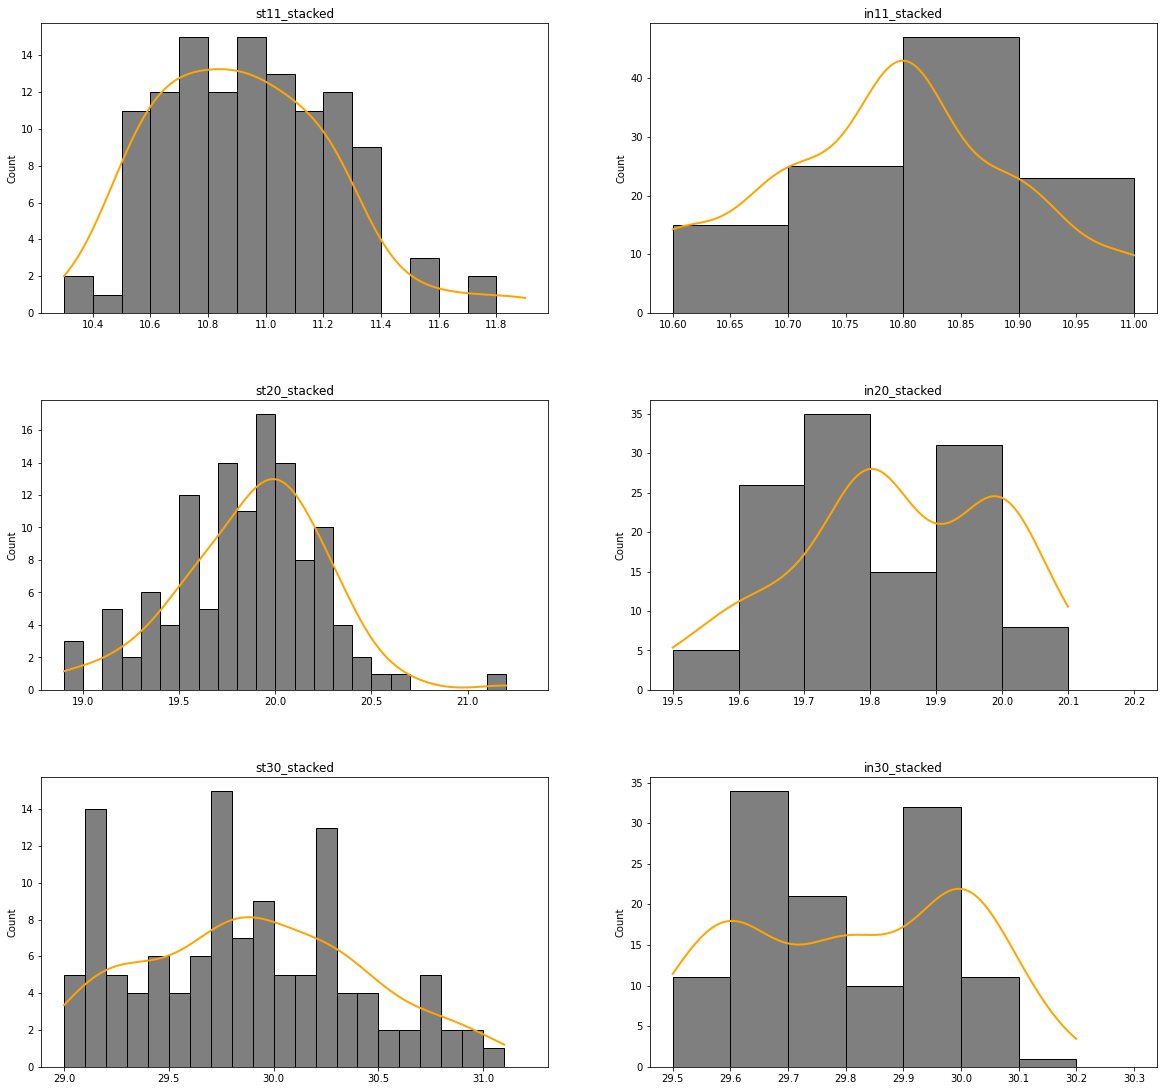

In [41]:
# Histograms with kde lines

counter = 1
plt.subplots(figsize=(20, 40))

for name, value in datasets_stacked.items():
    plt.subplot(len(datasets), 2, counter)
    plt.subplots_adjust(hspace = 0.3)
    sns.histplot(value,
                color="black",
                 kde=True,
                 binwidth=0.1,
                 line_kws={'linewidth': 2}).lines[0].set_color('orange')
    plt.title(name)

    counter+=1

From the above histograms, we can read that the values for the blocks produced with the innovative technology are less dispersed. 

In [42]:
# Mann-Whitney U Test 

s11, p11 = mannwhitneyu(x=st11.stack().values,
                        y=in11.stack().values,
                        alternative='two-sided')

s20, p20 = mannwhitneyu(x=st20.stack().values,
                        y=in20.stack().values,
                        alternative='two-sided')

s30, p30 = mannwhitneyu(x=st30.stack().values,
                        y=in30.stack().values,
                        alternative='two-sided')

p_value = [p11, p20, p30]
name_list = ["Block 11", "Block 20", "Block 30"]

for value, name in zip(p_value, name_list):
    print("Mann-Whitney U Test for:", name,
          "\n-------------",
          "\nstatistics ->", np.round(value,8),
          "\np-value ->", np.round(value,8))
    if value >= .05:
        print("Judgment: H0")
    else:
        print("Judgment: H1")
    print()

Mann-Whitney U Test for: Block 11 
------------- 
statistics -> 0.00121907 
p-value -> 0.00121907
Judgment: H1

Mann-Whitney U Test for: Block 20 
------------- 
statistics -> 0.04780307 
p-value -> 0.04780307
Judgment: H1

Mann-Whitney U Test for: Block 30 
------------- 
statistics -> 0.19553904 
p-value -> 0.19553904
Judgment: H0



**The Mann-Whitney U** test is a nonparametric test of the null hypothesis that the distribution underlying sample *st* is the same as the distribution underlying sample *in*.
>$\alpha = 5\%$ <br />
H0: The samples are from the same distribution.. <br />
H1: The samples aren't from the same distribution.

For blocks in the category: **11** and **20** we *reject the null hypothesis in favor of the alternative hypothesis* by stating that the block made by the innovative method is significantly different from the block made by the traditional method. The result of the statistical test does not allow us to make such a judgment about the blocks in category **30**.

Based on the values of the *statistic* and *p-value*, it can be assumed that the higher the block category (*the range around which the average value of the physical property under study should oscillate*), the more similar the blocks will be to each other. 

# Presentation of the differences between a block made with an innovative method and a standard method. 

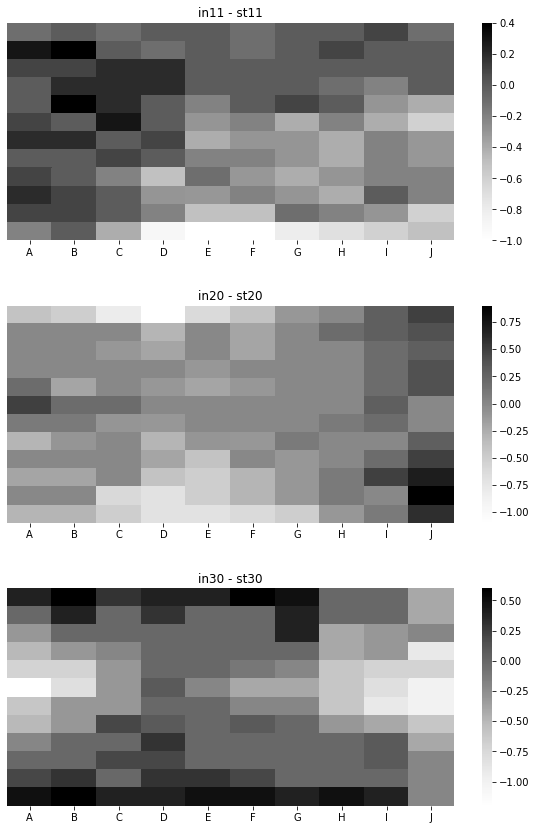

In [43]:
# Heatmaps for subtract datasets: innovation minus standard

counter = 1
plt.subplots(figsize=(10, 30))

for name, value in datasets_subtract.items():
    plt.subplot(len(datasets), 1, counter)
    plt.subplots_adjust(hspace = 0.3)
    sns.heatmap(value, 
                cmap="Greys", 
                yticklabels=False,
                vmax=value.max().max(),
                vmin=value.min().min())
    plt.title(name)

    counter+=1

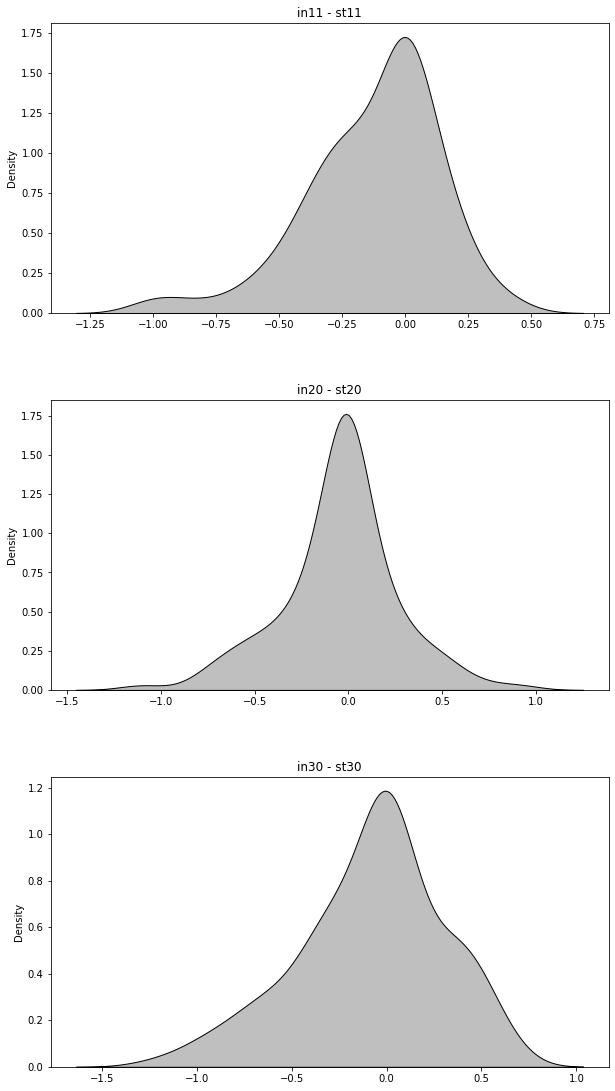

In [44]:
# KDEs plots for subtracted datasets

counter = 1
plt.subplots(figsize=(10, 40))

for name, value in datasets_subtract.items():
    plt.subplot(len(datasets), 1, counter)
    plt.subplots_adjust(hspace = 0.3)
    sns.kdeplot(data=value.stack().values, 
                fill=True, 
                color="black")
    plt.title(name)
    
    counter+=1

From the above graphs, it can be concluded that, for example, a category 11 block made by the standard method has a small number of higher values than its analogue made by the innovative method. The block in category 20 has fairly equal amounts of lower and higher values, while the block in category 30 has a predominance of lower values in the block made by the standard method. 

The heatmaps additionally show the location of the occurrence of differences between the blocks.

# Comparing blocks using KDE charts and boxplots

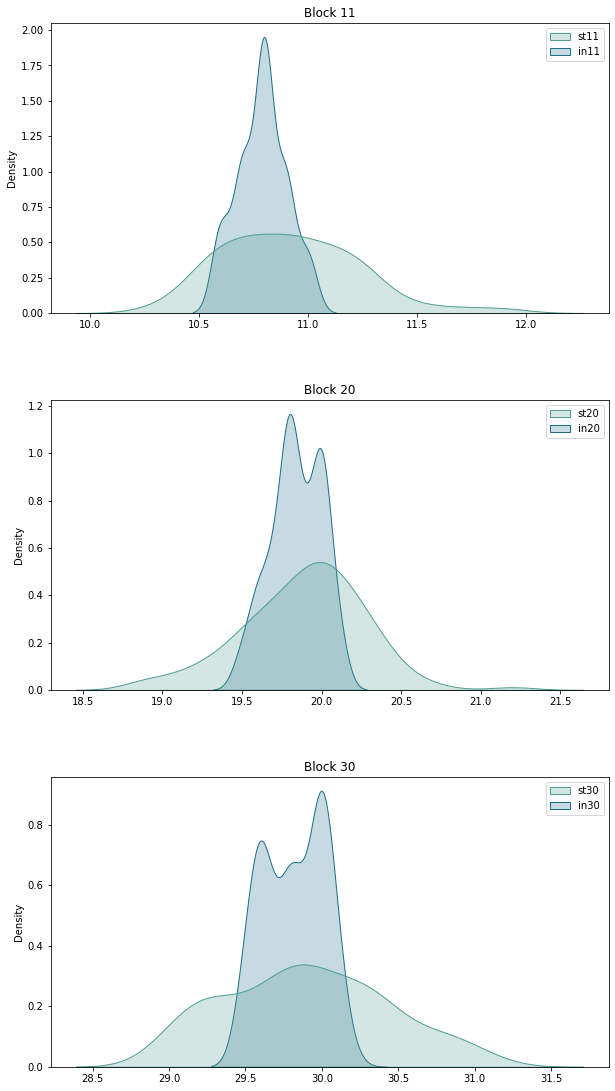

In [45]:
# KDEs plots for datasets comparison

counter = 1
plt.subplots(figsize=(10, 40))

for name, value in datasets_comp.items():
    plt.subplot(len(datasets), 1, counter)
    plt.subplots_adjust(hspace = 0.3)
    sns.kdeplot(data=value, 
                fill=True, 
                palette="crest")
    plt.title(name)
    
    counter+=1

KDE charts show that blocks made with innovative technology are more homogeneous than standard counterparts.

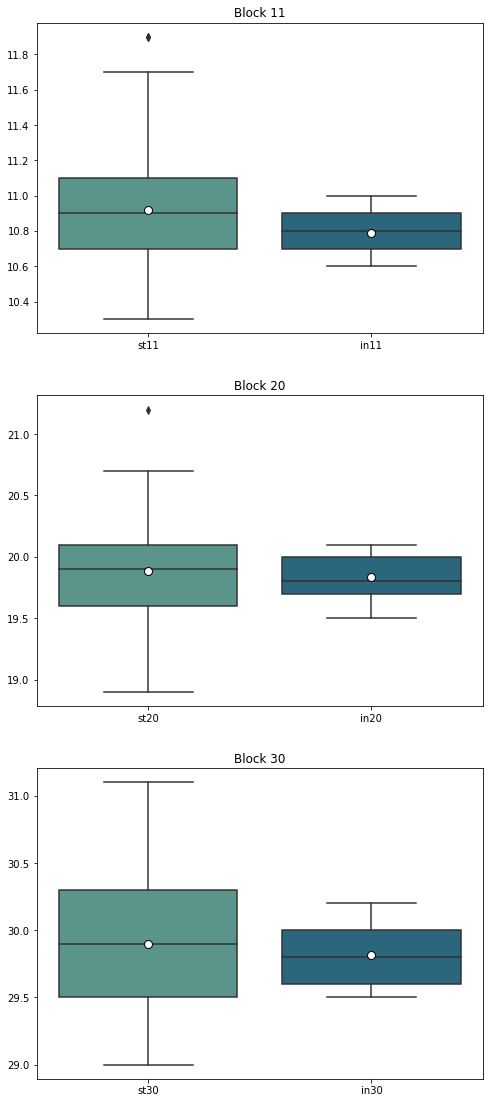

In [46]:
# Boxplots for datasets comparison

counter = 1
plt.subplots(figsize=(8, 40))

for name, value in datasets_comp.items():
    plt.subplot(len(datasets), 1, counter)
    sns.boxplot(data=value, 
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                           "markersize":"8"},
                palette="crest")
    plt.title(name)

    counter+=1

The boxplots also support the conclusion that the blocks made with the innovative technology are more homogeneous and have less dispersion of the physical property under study.

# Conclusions

Based on the results of the analysis, it is concluded that the blocks made by the innovative method are more homogeneous than those made by the traditional method. 